In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("house_prices.csv")

In [3]:
# Variable superficie total
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Máscara casas menores de 6000 sqft
df = df[df['TotalSF']<6000]

In [4]:
# Preparación datos
X = df[['TotalSF']]   # pandas DataFrame
y = df['SalePrice']   # pandas Series

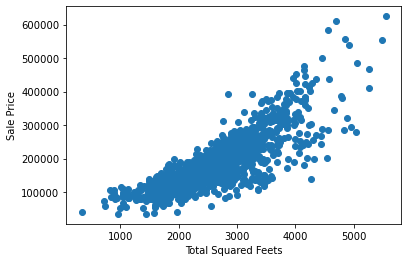

In [5]:
# Precio vivienda en función del número de sqft (squared feets)
plt.scatter(X, y)
plt.xlabel('Total Squared Feets')
plt.ylabel('Sale Price');

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.linear_model import LinearRegression

In [13]:
#Create an instance of the model
reg = LinearRegression()

In [14]:
#Fit the regressor
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
#Do predictions
y_pred = reg.predict(X_test)

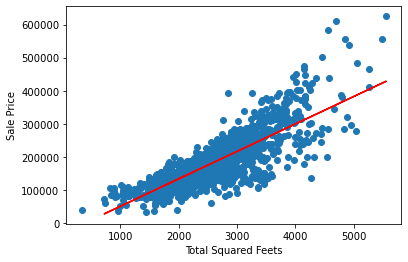

In [17]:
#Visualización de los datos
plt.scatter(X,y)
plt.plot(X_test,y_pred, 'r')
plt.xlabel('Total Squared Feets')
plt.ylabel('Sale Price');

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
reg_gk = GridSearchCV(KNeighborsRegressor(),
                        param_grid={'n_neighbors':np.arange(3,50)},
                        scoring="neg_mean_absolute_error")


In [22]:
#Fit will test all of the combination
reg_gk.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_absolute_error')

In [24]:
#Saber el mejor
reg_gk.best_params_

{'n_neighbors': 44}

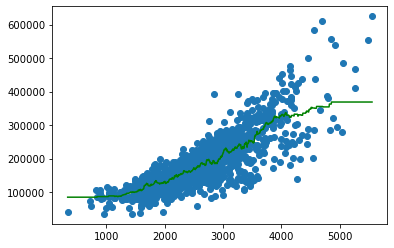

In [25]:
plt.scatter(X,y)
area_ficticias = np.linspace(X['TotalSF'].min(),X['TotalSF'].max(),1000)
plt.plot(area_ficticias,reg_gk.predict(pd.DataFrame(area_ficticias)),'g')

3. Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
reg_gd = GridSearchCV(DecisionTreeRegressor(),
                      param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                      scoring="neg_mean_absolute_error")

In [54]:
# 3 - Entrenar el modelo
reg_gd.fit(X, y)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='neg_mean_absolute_error')

In [55]:
reg_gd.best_params_

{'max_depth': 5, 'min_samples_leaf': 40}

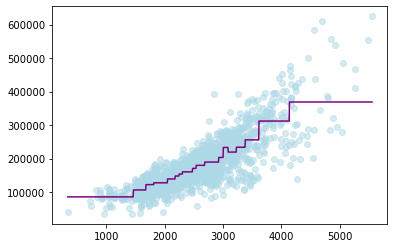

In [59]:
plt.scatter(X,y, c='lightblue', alpha=0.5)
area_ficticias = np.linspace(X["TotalSF"].min(),X["TotalSF"].max(),1000)
plt.plot(area_ficticias,reg_gd.best_estimator_.predict(pd.DataFrame(area_ficticias)),c="purple")

Metrics

In [65]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

Regression
* **Mean Absolute Error (MAE)**: is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measures give an idea of the magnitude of the error, but no idea of direction (under or over predicting).

$$\text{MAE:}\hspace{10pt}\frac{1}{n}\sum_{i=1}^n{|y_i-x_i|} = \frac{1}{n}\sum_{i=1}^{n}|e_i|$$

* **Mean Squared Error (MSE)**: is much like the MAE in that it provides a gross idea of the magnitude of error. Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the RMSE.

$$\text{RMSE:}\hspace{10pt}\sqrt{\frac{1}{n}\sum_{i=1}^n|y_i-x_i|^{2}}$$

* $R^2$: provides an indication of the goodness of fit of a set of predictions to the actual values. In statistics, this measure is called the coefficient of determination. This is a value between 0 and 1 for non-fit and perfect fit respectively.


In [26]:
from sklearn.model_selection import cross_val_score

In [87]:
mae_reg = cross_val_score(reg,X,y,scoring="neg_mean_absolute_error").mean()
rmse_reg = cross_val_score(reg,X,y,scoring="neg_root_mean_squared_error").mean
r2_reg = cross_val_score(reg,X,y,scoring="r2").mean()


In [88]:
mae_gk = cross_val_score(reg_gk.best_estimator_,X,y,scoring="neg_mean_absolute_error").mean()
rmse_gk = cross_val_score(reg_gk,X,y,scoring="neg_root_mean_squared_error").mean()
r2_gk = cross_val_score(reg_gk,X,y,scoring="r2").mean()


In [89]:
mae_gd = cross_val_score(reg_gd.best_estimator_,X,y,scoring="neg_mean_absolute_error").mean()
rmse_gd = cross_val_score(reg_gd,X,y,scoring="neg_root_mean_squared_error").mean()
r2_gd = cross_val_score(reg_gd,X,y,scoring="r2").mean()


In [90]:
m_g = pd.DataFrame(index=['reg','reg_gk','reg_gd'])
m_g['Mean Absolute Error']= mae_reg, mae_gk, mae_gd
m_g['Root Mean Squared Error'] = rmse_reg, rmse_gk, rmse_gd
m_g['R2']= r2_reg, r2_gk, r2_gd

m_g

,Mean Absolute Error,Root Mean Squared Error,R2
reg,-31053.225861,<built-in method mean of numpy.ndarray object ...,0.674322
reg_gk,-30279.436192,-43923.6,0.665023
reg_gd,-30334.626244,-45642.7,0.636871


* MAE: Observamos que el valor de KNN es mejor porque es menor en valor absoluto
* MSE:
* R2: Linear regression es mejor porque el valor es el más cercano a 1

Visualización de todos los métodos juntos

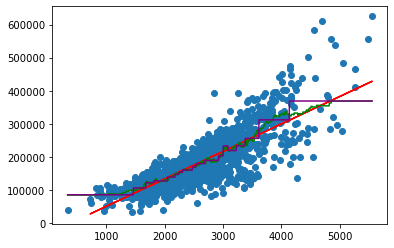

In [92]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,c="red")
area_ficticias = np.linspace(X["TotalSF"].min(),X["TotalSF"].max(),1000)
plt.plot(area_ficticias,reg_gk.predict(pd.DataFrame(area_ficticias)),c="green")
plt.plot(area_ficticias,reg_gd.best_estimator_.predict(pd.DataFrame(area_ficticias)),c="purple")